# Probabilistic PCA

## Imports

In [1]:
from ppca import PPCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris,load_breast_cancer,load_wine
from sklearn.decomposition import PCA

ModuleNotFoundError: No module named 'ppca'

## Datasets

In [2]:
# Loading data

# data = load_iris()
data = load_breast_cancer()
# data = load_wine()

X, y = data['data'], data['target']

## PCA vs PPCA vs PPCA generated comparison

In [5]:
# PPCA parameters
n_components = 3
method = 'em'
epochs = 1000

In [8]:
# PPCA
pca = PPCA(n_components=n_components, method=method, max_iter=epochs)
Xt = pca.fit_transform(X)

# Sklearn PCA for comparison
pca_sklearn = PCA(n_components=n_components)
Xt_sklearn = pca_sklearn.fit_transform(X)

# Generated data from model
X_gen_t = pca.sample_transform(n_samples=200)

PPCA initialized with n_components=3, method=em
Starting EM fitting on 1000 epochs...


EM: 100%|██████████| 1000/1000 [00:00<00:00, 1069.53iter/s, W_change=0.0423]


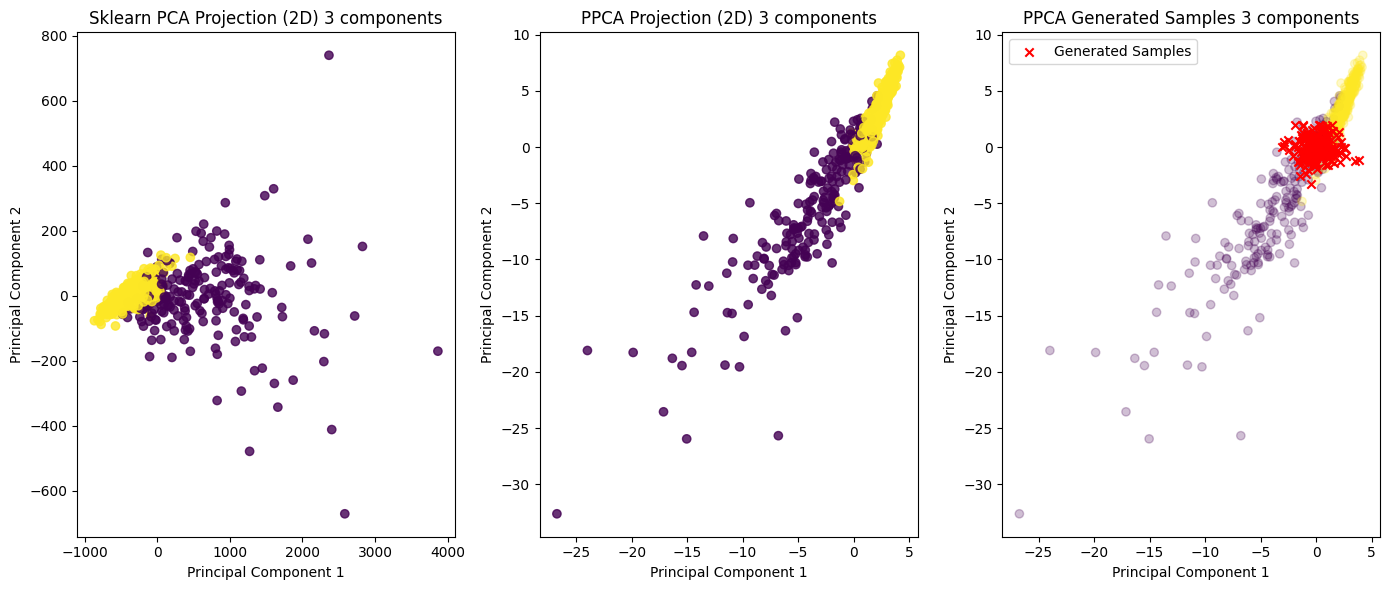

In [10]:
# Grouped plots in one figure with two subplots
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# Left: sklearn PCA projection
scatter1 = axs[0].scatter(Xt_sklearn[:, 0], Xt_sklearn[:, 1], c=y, cmap='viridis', alpha=0.8)
axs[0].set_title(f'Sklearn PCA Projection (2D) {n_components} components')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')

# Middle: original PPCA projection
scatter2 = axs[1].scatter(Xt[:, 0], Xt[:, 1], c=y, cmap='viridis', alpha=0.8)
axs[1].set_title(f'PPCA Projection (2D) {n_components} components')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')

# Right: overlay generated samples on a faded original projection
X_gen_t = pca.sample_transform(n_samples=200)
axs[2].scatter(Xt[:, 0], Xt[:, 1], c=y, cmap='viridis', alpha=0.25)
axs[2].scatter(X_gen_t[:, 0], X_gen_t[:, 1], c='red', marker='x', label='Generated Samples')
axs[2].set_title(f'PPCA Generated Samples {n_components} components')
axs[2].set_xlabel('Principal Component 1')
axs[2].set_ylabel('Principal Component 2')
axs[2].legend()

plt.tight_layout()
plt.show()